In [55]:
import pandas as pd
import numpy as np


input_dir = "options_data/master_iv_rv_crush_with_price_change_2.csv"
output_dir = "options_data/master_iv_rv_crush_with_price_change_final.csv"
input = pd.read_csv(input_dir)
input

,ticker,earn_date,type,strike,pre_date,post_date,price_pre,price_post,price_change,IV_pre,IV_post,IV_crush,RV30
0,AAL,2022-01-20,call,18.5,2022-01-19,2022-01-21,0.48,0.29,-0.19,1.239547,0.747508,0.492039,0.257414
1,AAL,2022-01-20,put,18.5,2022-01-19,2022-01-21,1.39,2.88,1.49,3.607027,NaN,NaN,0.257414
2,AAL,2022-04-21,call,18.5,2022-04-20,2022-04-22,1.40,2.96,1.56,3.626442,NaN,NaN,0.317945
3,AAL,2022-04-21,put,18.5,2022-04-20,2022-04-22,0.54,1.14,0.60,1.401531,2.957433,-1.555903,0.317945
4,AAL,2022-07-21,call,15.5,2022-07-20,2022-07-22,0.60,0.56,-0.04,1.851339,1.727610,0.123729,0.222047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,ZBRA,2025-04-29,put,250.0,2025-04-28,2025-04-30,17.60,23.30,5.70,3.379300,4.477069,-1.097769,1.019806
6018,ZBRA,2025-08-05,call,340.0,2025-08-04,2025-08-06,20.84,17.50,-3.34,2.935122,2.463471,0.471650,1.520862
6019,ZBRA,2025-08-05,put,340.0,2025-08-04,2025-08-06,16.58,22.92,6.34,2.340197,3.235649,-0.895452,1.520862
6020,ZBRA,2025-10-28,call,300.0,2025-10-27,2025-10-29,28.50,12.00,-16.50,4.557274,1.913211,2.644063,0.907466


In [56]:
#pre-processing 
input["earn_date"] = pd.to_datetime(input['earn_date'])
input = input.sort_values("earn_date")


In [57]:
tickers = [
    "AAPL","MSFT","GOOGL","GOOG","AMZN","META","NVDA","AVGO","CRM","ADBE","CSCO",
    "ORCL","TXN","QCOM","AMD","IBM","INTC","AMAT","INTU","MU","ANET","NOW","KLAC",
    "LRCX","SNPS","CDNS","PANW","FTNT","BKNG","NFLX","ADP","PAYX","MSI","HPQ",
    "WDC","ZBRA","GLW","AKAM","ENPH","FSLR","MCHP","MPWR","SWKS","QRVO","TSM",
    "JPM","BAC","WFC","C","GS","MS","BLK","SCHW","CME","ICE","SPGI","MCO","CB",
    "PGR","TRV","AIG","AON","MET","PRU","ALL","AFL","BK","STT","TFC","USB","RF",
    "MTB","HBAN","FITB","CMA","KEY","COF","DFS","PNC","V","MA","PYPL","AXP",
    "BRK.B","TROW","AMP","BEN","IVZ","NTRS","TSLA","HD","MCD","NKE","SBUX","TJX",
    "LOW","TGT","ROST","DG","DLTR","MAR","HLT","EBAY","ETSY","YUM","CMG","CCL",
    "RCL","NCLH","AAP","AZO","ORLY","ULTA","LEN","PHM","DHI","NVR","TOL","POOL",
    "PG","KO","PEP","WMT","COST","MDLZ","MO","PM","KMB","CL","CLX","TAP","STZ",
    "GIS","K","CPB","SJM","KR","WBA","HSY","CHD","BG","ADM","CAT","DE","UPS",
    "FDX","GE","HON","MMM","ITW","EMR","ETN","PH","ROK","GWW","JCI","CARR",
    "OTIS","CSX","NSC","UNP","LUV","DAL","AAL","UAL","MAS","J","IR","NDSN","FAST",
    "SNA","CMI","PCAR","URI","ALLE","AME","AOS","EXPD","XOM","CVX","COP","OXY",
    "EOG","PXD","DVN","MRO","APA","HES","VLO","MPC","PSX","HAL","SLB","BKR",
    "LIN","APD","ECL","SHW","NUE","NEM","FCX","MOS","CF","ALB","MLM","VMC","PKG",
    "IP","WRK","BALL","T","VZ","TMUS","NEE","DUK","SO","SRE","EXC","AEP","XEL",
    "PEG","ED","D","WEC","EIX","PNW","AEE","CMS"
]

test = input[input["ticker"].isin(tickers)]
test

,ticker,earn_date,type,strike,pre_date,post_date,price_pre,price_post,price_change,IV_pre,IV_post,IV_crush,RV30
1363,CSCO,2021-11-17,put,56.0,2021-11-16,2021-11-18,1.57,2.20,0.63,1.346252,1.885528,-0.539276,NaN
1362,CSCO,2021-11-17,call,56.0,2021-11-16,2021-11-18,1.95,0.48,-1.47,1.664924,0.407225,1.257699,NaN
2837,J,2021-11-23,put,140.0,2021-11-22,2021-11-24,1.85,6.10,4.25,0.636167,2.091060,-1.454892,NaN
2836,J,2021-11-23,call,140.0,2021-11-22,2021-11-24,9.50,11.29,1.79,3.250473,3.865478,-0.615005,NaN
2495,HPQ,2021-11-23,put,31.0,2021-11-22,2021-11-24,0.90,0.26,-0.64,1.394010,0.404957,0.989053,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,EOG,2025-11-06,call,108.0,2025-11-05,2025-11-07,3.00,1.40,-1.60,1.327327,0.617568,0.709759,0.252849
1394,CSCO,2025-11-12,call,70.0,2025-11-11,2025-11-13,13.30,7.45,-5.85,NaN,NaN,NaN,0.218860
1395,CSCO,2025-11-12,put,70.0,2025-11-11,2025-11-13,7.00,2.65,-4.35,4.805149,1.817030,2.988119,0.218860
464,AMAT,2025-11-13,call,220.0,2025-11-12,2025-11-14,20.28,25.00,4.72,4.421369,NaN,NaN,0.263165


In [58]:
##IV filter section - CHANGE TO PRINT MORE CASH
master = test.copy()

##IV_pre RV ratio
master["IV_pre / RV"] = master["IV_pre"] / master["RV30"]
#master = master[master["IV_pre / RV"] >= 17]


#winrate of trade - number of negatives / total
#average win
#average loss
master["percentage_change"] = master["price_change"] / master["price_pre"]
master["win/loss"] = np.where(master["price_change"] < 0, 1, 0) #win/loss column
  
master


,ticker,earn_date,type,strike,pre_date,post_date,price_pre,price_post,price_change,IV_pre,IV_post,IV_crush,RV30,IV_pre / RV,percentage_change,win/loss
1363,CSCO,2021-11-17,put,56.0,2021-11-16,2021-11-18,1.57,2.20,0.63,1.346252,1.885528,-0.539276,NaN,NaN,0.401274,0
1362,CSCO,2021-11-17,call,56.0,2021-11-16,2021-11-18,1.95,0.48,-1.47,1.664924,0.407225,1.257699,NaN,NaN,-0.753846,1
2837,J,2021-11-23,put,140.0,2021-11-22,2021-11-24,1.85,6.10,4.25,0.636167,2.091060,-1.454892,NaN,NaN,2.297297,0
2836,J,2021-11-23,call,140.0,2021-11-22,2021-11-24,9.50,11.29,1.79,3.250473,3.865478,-0.615005,NaN,NaN,0.188421,0
2495,HPQ,2021-11-23,put,31.0,2021-11-22,2021-11-24,0.90,0.26,-0.64,1.394010,0.404957,0.989053,NaN,NaN,-0.711111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,EOG,2025-11-06,call,108.0,2025-11-05,2025-11-07,3.00,1.40,-1.60,1.327327,0.617568,0.709759,0.252849,5.249478,-0.533333,1
1394,CSCO,2025-11-12,call,70.0,2025-11-11,2025-11-13,13.30,7.45,-5.85,NaN,NaN,NaN,0.218860,NaN,-0.439850,1
1395,CSCO,2025-11-12,put,70.0,2025-11-11,2025-11-13,7.00,2.65,-4.35,4.805149,1.817030,2.988119,0.218860,21.955382,-0.621429,1
464,AMAT,2025-11-13,call,220.0,2025-11-12,2025-11-14,20.28,25.00,4.72,4.421369,NaN,NaN,0.263165,16.800725,0.232742,0


In [59]:

# # For each symbol, compute max consecutive losses
# def max_consecutive_losses(x):
#     # Identify where loss streaks reset (win_loss != 0)
#     return (x == 0).astype(int).groupby((x != 0).cumsum()).sum().max()

# # Compute max streak per symbol
# loss_streaks = (
#     master.groupby("ticker")["win/loss"]
#       .apply(max_consecutive_losses)
# )

# # Find symbols with 3+ losses in a row
# bad_symbols = loss_streaks[loss_streaks >= 3].index
# bad_symbols

# # Filter them out of the dataframe
# master = master[~master["ticker"].isin(bad_symbols)]

In [ ]:
master = master[master["IV_pre / RV"] >= 16]

In [61]:
win_rate = master["win/loss"].mean()
print(f"Win Rate: {win_rate}")

# Average win and loss percentage
average_win = abs(master.loc[master["price_change"] < 0, "percentage_change"].mean())
average_loss = abs(master.loc[master["price_change"] > 0, "percentage_change"].mean())
print(f"Average Win: {average_win}")
print(f"Average Loss: {average_loss}")

#mean percentage change for wins
#mean percentage change for losses 
win = win_rate * average_win 
loss = ((1 - win_rate) * average_loss)

net_expected = win - loss
net_expected

Win Rate: 0.6767895878524945
Average Win: 0.556180735844181
Average Loss: 0.7877001987258822


np.float64(0.12182442510461611)

In [62]:
#kelly criterion
#pricechange / pricepre <- wins and losses, and get the average for each 

def kelly_criterion(win_rate, avg_win, avg_loss):
    """
    Calculate Kelly Criterion for position sizing
    
    Parameters:
    win_rate (float): Probability of winning (0 to 1)
    avg_win (float): Average win percentage (e.g., 0.05 for 5%)
    avg_loss (float): Average loss percentage (e.g., -0.02 for -2%)
    
    Returns:
    float: Kelly percentage (0 to 1)
    """
    # Win/loss ratio (use absolute value since loss is negative)
    win_loss_ratio = abs(avg_win / avg_loss)
    
    # Kelly formula
    kelly = win_rate - (1 - win_rate) / win_loss_ratio
    
    # Cap at reasonable levels (0% to 100%)
    return max(0, min(kelly, 1))


kelly_pct = kelly_criterion(win_rate, average_win, average_loss)
print(f"Full Kelly: {kelly_pct:.1%}")
print(f"Half Kelly (safer): {kelly_pct/2:.1%}")

Full Kelly: 21.9%
Half Kelly (safer): 11.0%


In [63]:
#start with 100k trading account
#allocate half kelly bank roll per trade
#run over 2023 - 2025
#graph pnl over lifetime
#calculate the stev of account value 

#factor in brokerage costs

starting_amount = 100000
criterion_perc = kelly_pct/2#half kelly

master = master[
    (master["earn_date"] >= "2024-01-01") &
    (master["earn_date"] <= "2026-01-01")
]

#master = master[~master["ticker"].isin(["RTX", "BA", "PFE", "LMT", "MRK", "UNH", "ABBV", "LLY", "JNJ", "CAT"])] filter for defense and pharma
#acktest2 = master.copy().reset_index(drop=True)
#acktest2 = backtest2[backtest2["win/loss"] == 1]
backtest = master.copy().reset_index(drop=True)

backtest["percentage_won"] = -1*backtest["percentage_change"]
account_value = starting_amount
account_values = [account_value]

for i in range(len(backtest)):
    position_size = account_value * criterion_perc

    contract_n = (position_size / backtest.loc[i, "price_pre"]).round() #integer
    #brokerage_cost = 0
    brokerage_cost = 0.1 * contract_n 
    

    # Calculate trade P&L (brokerage costs for entry + exit)
    trade_pnl = position_size * backtest.loc[i, "percentage_won"] - (brokerage_cost * 2)
    
    # Update account value
    account_value += trade_pnl
    account_values.append(account_value)

# Store final account values (remove first value to align with trades)
backtest["MONEY"] = account_values[1:]

In [66]:
backtest

,ticker,earn_date,type,strike,pre_date,post_date,price_pre,price_post,price_change,IV_pre,IV_post,IV_crush,RV30,IV_pre / RV,percentage_change,win/loss,percentage_won,MONEY
0,KR,2021-12-02,put,41.0,2021-12-01,2021-12-03,2.38,4.10,1.72,2.785837,4.805149,-2.019312,0.156476,17.803659,0.722689,0,-0.722689,8.756293e+04
1,BAC,2022-01-19,call,45.0,2022-01-18,2022-01-20,4.04,7.00,2.96,4.305481,NaN,NaN,0.196838,21.873235,0.732673,0,-0.732673,7.700414e+04
2,RF,2022-01-20,call,24.0,2022-01-19,2022-01-21,2.40,0.90,-1.50,4.798537,1.793339,3.005198,0.251640,19.069062,-0.625000,1,0.625000,8.343463e+04
3,NFLX,2022-01-20,put,545.0,2022-01-19,2022-01-21,47.35,124.57,77.22,4.172479,NaN,NaN,0.169866,24.563349,1.630834,0,-1.630834,6.240304e+04
4,FCX,2022-01-26,call,40.0,2022-01-25,2022-01-27,3.45,3.15,-0.30,4.135494,3.774370,0.361123,0.205080,20.165253,-0.086957,1,0.086957,6.268180e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,AAP,2025-10-30,put,57.0,2025-10-29,2025-10-31,4.77,7.75,2.98,4.018508,NaN,NaN,0.142336,28.232552,0.624738,0,-0.624738,5.077305e+06
318,FTNT,2025-11-05,call,85.0,2025-11-04,2025-11-06,4.93,1.52,-3.41,2.776917,0.853215,1.923703,0.155950,17.806407,-0.691684,1,0.691684,5.586967e+06
319,FTNT,2025-11-05,put,85.0,2025-11-04,2025-11-06,5.18,5.43,0.25,2.924748,3.066042,-0.141293,0.155950,18.754343,0.048263,0,-0.048263,5.512142e+06
320,APA,2025-11-05,put,22.5,2025-11-04,2025-11-06,1.93,0.38,-1.55,4.119344,0.812186,3.307158,0.238164,17.296232,-0.803109,1,0.803109,6.106554e+06


Maximum Drawdown: -64.59%
Quarterly Sharpe: 0.37
Annualized Sharpe: 0.73


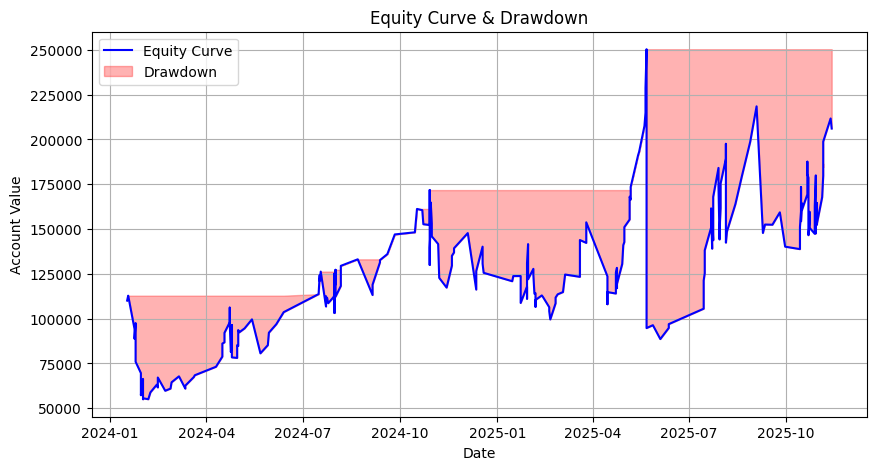

In [64]:
import matplotlib.pyplot as plt


account_values = backtest["MONEY"]  

#Compute returns
returns = account_values.pct_change().fillna(0)

#Maximum Drawdown (MDD)
running_max = account_values.cummax()
drawdown = (account_values - running_max) / running_max
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

earning_dates = pd.to_datetime(backtest["earn_date"])
# Assign each trade to a quarter, compute per-quarter returns, and subtract quarterly rfr
backtest["quarter"] = earning_dates.dt.to_period("Q")
quarterly_returns = backtest.groupby("quarter")["MONEY"].agg(['first', 'last'])
quarterly_returns['return'] = (quarterly_returns['last'] - quarterly_returns['first']) / quarterly_returns['first']
rfr_quarter = 0.045 / 4 #interest rate per year, divided into quarters
quarterly_returns['excess_return'] = quarterly_returns['return'] - rfr_quarter

#Sharpe ratio per quarter
sharpe_per_quarter = quarterly_returns['excess_return'].mean() / quarterly_returns['excess_return'].std()

#Annualize Sharpe (4 quarters/year)
sharpe_annualized = sharpe_per_quarter * np.sqrt(4)

print(f"Quarterly Sharpe: {sharpe_per_quarter:.2f}")
print(f"Annualized Sharpe: {sharpe_annualized:.2f}")


plt.figure(figsize=(10,5))
plt.plot(backtest["earn_date"], account_values, label='Equity Curve', color='blue')
plt.fill_between(backtest["earn_date"], account_values, account_values.cummax(), 
                 color='red', alpha=0.3, label='Drawdown')
plt.title('Equity Curve & Drawdown')
plt.xlabel('Date')
plt.ylabel('Account Value')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
quarterly_returns['excess_return'].std()

np.float64(0.6044700600966524)